<a href="https://colab.research.google.com/github/paulosrl/NotebooksGoogleColab/blob/main/Limpeza_de_dados%2C_outliers_e_valores_ausentes_maior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Limpando os dados e detectando *Outliers* utilizando a biblioteca Pandas do Python**

Entre as habilidades básicas de um Cientista de Dados, podemos destacar:

* Lidar com valores ausentes;

* Lidar com outliers;

* Transformar os dados.

Antes de começar qualquer análise é necessário **validar os dados**, este processo permitirá ao analista conhecer **melhor** os dados que serão analisados.

Esta validação é de extrema importância, pois a **qualidade dos dados** irá impactar **diretamente** na **qualidade da análise** e consequentemente na sua **visualização**, inclusive para construção de modelos de algoritmos que irão utilizar conceitos de aprendizado de máquina (*Machine Learning*).

**O processo de análise dos dados, consiste em analisar:**

* **O Tipo de Dados**
  * Ex: Coluna de data deve estar em formato `datetime`, coluna de valores monetários deve estar no formato `float`.
* **O intervalo dos Dados**
  * Ex: Meses de 1 a 12, dias do mês de 1 a 31.
* **Quais os dados que são obrigatórios**
  * Ex: Algumas colunas não podem estar vazias
* **Quais os dados que são únicos**
  * Ex: CPF, RG, CNPJ, ID de usuário.
* **Quais os dados categóricos**
  * Ex: Gênero Masculino ou Feminino.
* **Os dados estão no padrão esperado**
  * Ex: (61) 98765-4321
* **A validade entre os campos que compõem a base de dados**
  * Ex: Data de saída não poder ser anterior à data de entrada.

Artigo recomendado:

https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

## **Fonte de dados**

Os dados atualizados podem ser obtidos a partir do **[ISP - Dados Abertos - Institunto de Segurança Pública](http://www.ispdados.rj.gov.br/estatistica.html)**

Neste estudo faremo uso dos dados já coletados e disponsibilizados pelo Prof. [Carlos Melo](https://sigmoidal.ai/author/carlos/). O Arquivo chama-se **[violencia_rio.csv](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv)**, está no formato `csv`.

### **Importando os dados e as bibliotecas**

Nesta seção iremos importar os dados e importar as bibliotecas que serão utilizadas nesta análise.

In [ ]:
# importar a biblioteca pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math # biblioteca para cálculos matemáticos
import seaborn as sns # biblioteca para apresentação visual
plt.style.use('dark_background')
# importando os dados e criando o DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv', sep=',')

## **Análise inicial dos Dados**

Antes da análise do dataset, é importante conhecer as primeiras características do mesmo, desta forma, os comandos a seguir irão listas o total de colunas e linhas que possui o dataset

### **Dimensão do Dataframe**

Os comandos a seguir permitem analisar as dimensões do dataset que será analisado.

In [ ]:
# verificar o tamanho do DataFrame
print("Colunas: ", df.shape[1])
print("Linhas: ", df.shape[0])

Colunas:  56
Linhas:  344


###**Nomes das colunas que compoem o Dataframe**

In [ ]:
# imprimir os nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

###**Tipos de dados das Colunas**

In [ ]:
# verificando os tipos das colunas
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

###**Listagem das 5 primeiras linhas do arquivo**

In [ ]:
# visualizando as 5 primeiras linhas do DataFrame
df.head(100)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1998,12,465,NaN,9,10.0,197,5331,NaN,393.0,NaN,309,88,1912,125,827,515,9,NaN,NaN,NaN,NaN,NaN,1676,5461,1629,483,NaN,NaN,NaN,4465,6577,NaN,NaN,NaN,NaN,844,NaN,NaN,NaN,1041,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,484,1342,1912,NaN,3
96,1999,1,530,4.0,4,29.0,231,5351,NaN,345.0,3410.0,368,82,2241,99,877,544,4,NaN,NaN,NaN,NaN,NaN,1457,5672,1899,499,NaN,NaN,NaN,4198,6596,0.0,NaN,NaN,NaN,800,NaN,NaN,NaN,1012,NaN,NaN,NaN,NaN,3021.0,NaN,112,NaN,NaN,NaN,567,1421,2241,32209.0,3
97,1999,2,508,7.0,14,25.0,229,5289,NaN,349.0,2943.0,347,97,2019,101,890,577,16,NaN,NaN,NaN,NaN,NaN,1530,5577,1603,431,NaN,NaN,NaN,4217,6251,0.0,NaN,NaN,NaN,632,NaN,NaN,NaN,961,NaN,NaN,NaN,NaN,2951.0,NaN,99,NaN,NaN,NaN,554,1467,2019,30621.0,3
98,1999,3,451,13.0,12,25.0,222,5463,NaN,328.0,3071.0,421,108,2652,121,900,633,20,NaN,NaN,NaN,NaN,NaN,1883,6738,1999,381,NaN,NaN,NaN,4576,6956,0.0,NaN,NaN,NaN,763,NaN,NaN,NaN,1437,NaN,NaN,NaN,NaN,3383.0,NaN,67,NaN,NaN,NaN,501,1533,2652,35094.0,3


###**Listagem das 5 útimas linhas do arquivo**

In [ ]:
#imprimindo as 5 últimas linhas
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


## **Dados Ausentes**

Algumas análises devem ser feitas para lidar com dados ausentes

* Que tipo de dado está ausente?
* Em qual proporção?
* De forma aleatória?

Todos essas perguntas devem ser feitas e responidadas para o tratamento de dados ausentes.

Na base de dados que estamos analisando (dados da violência do RJ) observamos que em algumas colunas, quase todos os dados ausentes. Qual o motivo da ausência dos dados? De onde os dados são extraídos? Qual o processo de coleta de dadps? Dados ausentes implicam algum significado?

Uma teoria é que os dados só começaram a ser coletados a partir de uma determinada data.

###**Analisando o percentual de valores ausentes por coluna**


In [ ]:
# verificando a presença e porcentagem de dados ausentes no DataFrame,
# organizando do maior para o menor em relação ao total de linhas
print('Colunas         \t      Porcentagem de valores ausentes na coluna')
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem de valores ausentes na coluna


roubo_bicicleta               80.23
furto_bicicleta               80.23
apreensao_drogas_sem_autor    52.33
posse_drogas                  52.33
apf                           52.33
aaapai                        52.33
cmp                           52.33
trafico_drogas                52.33
cmba                          52.33
sequestro_relampago           41.86
furto_coletivo                41.86
extorsao                      41.86
furto_celular                 41.86
roubo_apos_saque              41.86
roubo_conducao_saque          41.86
roubo_cx_eletronico           41.86
estupro                       41.86
estelionato                   41.86
pol_civis_mortos_serv         41.86
pol_militares_mortos_serv     41.86
pessoas_desaparecidas         38.37
encontro_ossada               38.37
roubo_celular                 31.40
lesao_corp_culposa            27.91
ameaca                        27.91
sequestro                     27.91
lesao_corp_morte              27.91
registro_ocorrencias        

###**Analisando os dados por uma coluna determinante no dataset**

**Ano**

Neste conjunto de dados a coluna **ano** é a coluna que determina quando os dados foram coletados, para uma análise temporal dos dados.

Esta coluna é uma das colunas mais importantes neste dataset.


In [ ]:
# dados ausentes por ano
#df.set_index('vano') define a coluna vano como o índice de consulta
#.isna().sum(level=0) soma a quantidade de valores AUSENTES
#level = 0 considera apenas a variável vano
df.set_index('vano').isna().sum(level=0)

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1992,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1993,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1994,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1995,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1996,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1997,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1998,0,0,12,0,0,0,0,12,0,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1999,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,0,12,12,12,0,12,12,12,0,12,12,12,12,0,12,0,12,12,12,0,0,0,0,0


## **Quais dados deverão ser tratados**

Neste conjunto de dados, o ideal é analisar os dados apenas no período em que se tem dados. Especialmente em algumas variáveis onde o volume é muito grande, qualquer tipo de preenchimento poderia **enviesar** os dados de forma que a análise deixasse de ser relevante.

Para outros casos, podemos considerar as seguintes hipóteses:

* **Excluir**
  * Se os dados ausentes estão em **pequeno** número,ocorrem **aleatoriamente**, e a ausência não acarreta nenhum problema, é melhor **excluir** a linha.
  * No caso da coluna, se ainda for possível analisar alguma parte dela, use-a, como é o caso neste conjunto de dados. Mas para algumas situações, o ideal é **excluir a coluna**.

* **Preencher**
  * Preencher as entradas com dados ausentes com valores estatísticos como a **média, mediana, moda ou zeros**.
  * A **média** é mais útil quando a distribuição dos dados é **normal**.
  * Em dados com distribuição mais enviesada (*skewed*), a **mediana** é uma solução mais robusta, pois ela é **menos** sensível a **outliers**.
  * Uma [Regressão Linear](https://https://oestatistico.com.br/regressao-linear-simples/) também pode ser útil, apesar de **sensível** a outliers, podem nos ajudar a inserir valores que  ajudem em uma melhor análise.
  * Identificar a entrada **ausente** com algum valor que indique esta ausência pode ser mais informativo, quando a ausência representa valor. Por exemplo, em dados **numéricos** preencher com **zero**, e em **categóricos** criar uma categoria "**Desconhecido**".

**Zeros não podem ser levados em consideração** em análises estatísticas.

#### **Visão geral dos dados do dataset**

A tomada de decisão em relação aos dados, está intimamente ligada ao dataset que está sendo analisado. Neste exemplo é possível observar na imagem que os campos **lesao_corp_morte, hom_por_interv_policial, estupro, hom_culposo e lesao_corp_culposa** começam com valores **preenchidos** na séria histórica, e depois ficam sem registro, isso pode ser em função da **não coleta** desses dados, erros ou junção com outros indicadores. Cabe ao analista decidir o que fará com essas colunas em relação ao que deseja extrair de informação dos dados.

<p align="center"><img src="https://raw.githubusercontent.com/paulosrl/imagens/master/colunasdadosRJ.jpg
"></p>



####**Tramento dos dados ausentes em um dataset**

Para esse estudo, faremos o tratamento dos dados do **Airbnb** referentes à cidade de **Nova Iorque**.



In [ ]:
# importando os dados
df_ny = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/eds_outliers/master/nyc.csv', index_col=0)

# verificando as dimensões do dataset colunas x linhas
print('Dimensões do Dataset',
    '\nColunas: ',df_ny.shape[1], "\n"
      'Linhas: ', df_ny.shape[0])

# verificando as primeiras linhas
df_ny.head()

Dimensões do Dataset 
Colunas:  16 
Linhas:  49530


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.37,2,335
2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,322,2020-06-07,4.64,1,276
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365


In [ ]:
# verificando dados ausentes
print('Colunas         \t      Porcentagem de valores ausentes para coluna')
(df_ny.isnull().sum() / df_ny.shape[0]*100).sort_values(ascending=False).round(2)


Colunas         	      Porcentagem de valores ausentes para coluna


reviews_per_month                 22.85
last_review                       22.85
name                               0.04
host_name                          0.01
availability_365                   0.00
calculated_host_listings_count     0.00
number_of_reviews                  0.00
minimum_nights                     0.00
price                              0.00
room_type                          0.00
longitude                          0.00
latitude                           0.00
neighbourhood                      0.00
neighbourhood_group                0.00
host_id                            0.00
id                                 0.00
dtype: float64

## **Excluindo dados ausentes do dataset**

Neste momento, **após analisar** os dados é necessário decidir se serão ou não excluídas algumas colunas. Esta decisão deve ser tomada **após entender** os dados que estão sendo analisados, e decidir o que é **relevante** para análise e o que não é.

Decidida qual ou quais colunas serão excluídas, é necessário verificar **o que será feito com os valores ausentes** nas colunas que irão fazer parte da análise, ou seja, esses valores serão exclúidos do dataset ou serão substituídos por outro valor a decidir qual é.

Neste dataset, iremos excluir os valores faltantes pois eles representam um percentual muito baixo da amostra.


### **Excluindo as colunas com dados faltantes**

In [ ]:
# excluindo as colunas com dados faltantes
df_ny.drop(columns=['reviews_per_month', 'last_review'], inplace=True)

In [ ]:
# verificando o dataset
print('Colunas         \t      Porcentagem')
(df_ny.isnull().sum() / df_ny.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


name                              0.04
host_name                         0.01
availability_365                  0.00
calculated_host_listings_count    0.00
number_of_reviews                 0.00
minimum_nights                    0.00
price                             0.00
room_type                         0.00
longitude                         0.00
latitude                          0.00
neighbourhood                     0.00
neighbourhood_group               0.00
host_id                           0.00
id                                0.00
dtype: float64

### **Excluindo as linhas com dados faltantes**

In [ ]:
# excluindo as linhas com dados faltantes
df_ny.dropna(axis=0, inplace=True)

## **Analisando os dados após a remoção das linhas e colunas**

In [ ]:
print('Colunas         \t      Porcentagem')
(df_ny.isnull().sum() / df_ny.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


availability_365                  0.0
calculated_host_listings_count    0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
neighbourhood_group               0.0
host_name                         0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

## **Outliers**

*Outliers* são pontos **discrepantes**, que estão **destoando** do padrão do conjunto de dados.

É  importante  **identificar** e **tratar** esses outliers, pois eles podem mostrar uma visão **distorcida** dos dados.

Podemos identificar um outlier de diversas formas, entre elas podemos citar:

* IQR Score
* Boxplots
* Scatter plots
* Z-Score

Vamos ver na prática o processo completo de limpeza de dados, tratando dados ausentes, convertendo os dados para o formato correto, e tratando dos outliers.
<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
"></p>

Para esse estudo, faremos o tratamento dos dados do Airbnb referentes à cidade de Nova Iorque.

###**Analisando a distribuição estatística dos dados**

Para verificar a presença de outliers é necessário fazer um resumo estatístico dos dados.

In [ ]:
# verificando a distribuição estatística
#round(1), arredonda as casas decimais para uma unidade
df_ny.describe().round(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,49506.00,4.950600e+04,49506.00,49506.00,49506.00,49506.00,49506.00,49506.00,49506.00
mean,22965296.44,8.511890e+07,40.73,-73.95,162.66,8.17,23.88,6.24,126.70
std,13525679.12,9.889048e+07,0.05,0.05,419.41,21.52,48.26,25.49,142.38
min,2060.00,2.259000e+03,40.50,-74.24,0.00,1.00,0.00,1.00,0.00
25%,10875806.00,9.268318e+06,40.69,-73.98,68.00,2.00,1.00,1.00,0.00
50%,22338936.00,3.801608e+07,40.72,-73.96,101.00,3.00,5.00,1.00,79.00
75%,35578705.00,1.373589e+08,40.76,-73.93,175.00,6.00,23.00,2.00,267.00
max,43703359.00,3.490826e+08,40.91,-73.71,10000.00,1250.00,746.00,280.00,365.00


### **Selecionando os possíveis outliers**

1.   A variável **price** tem o **mínimo** em **0**. Lembrando que a variável **price** trata do preço da diária dos imóveis em moeda local (USD), estamos vendo que o **Q3** está em 175 dólares, mas o **máximo** está em **10 mil** dólares. A **média** da coluna **price** está em 162.6 dólares, enquanto a mediana (Q2) está em 101 dólares, observa-se que a média está muito próxima do terceiro quartil (Q3) dos dados (75% dos dados).

2.   A variável **minimum_nights** tem como seu **máximo** o valor **1250**, sendo que o **Q3** está em **6**;

3.   As variáveis **number_of_reviews**, **calculated_host_listings_count** e **availability_365** também podem conter outliers, mas não vamos nos preocupar com elas agora, para percerver esses valores discrepantes analise o valor dos 75% dos dados junto com o valor máximo dessas colunas.

### **Análise dos outliers**

1.   Preço **não pode** ser igual a **0**;
2.   75% dos dados tem preços das diárias (**price**) de até 175 dólares, será que existe uma diária de **10.000 dólares**, provavelmente este valor é um **outlier**?;
3.   A coluna minimum_nights mostra que 75% dos dados tem até 6 noites na variável **minimum_nights**, o valor de **1.250 noites** como máximo muito provavelmente é um **outlier**;

### **Análise gráfica dos outliers utilizando Histogramas**

Um histograma é uma visualização gráfica de dados usando barras de diferentes alturas. Em um histograma, cada barra agrupa números em intervalos. As barras mais altas mostram que mais dados estão nesse intervalo. Um histograma exibe a forma e distribuição de dados amostrais discretos ou contínuos. ([Kanacademy](https://pt.khanacademy.org/math/ap-statistics/quantitative-data-ap/histograms-stem-leaf/v/histograms-intro))

O [histograma](https://www.fm2s.com.br/histograma/) permite obter as seguintes informações

* Centralidade: qual é o centro de distribuição? Onde é esperado que esteja a maioria das observações?
* Amplitude: a distribuição normalmente contém observações entre quais valores? Qual é o ponto de máximo e o ponto de mínimo?
* Simetria: será que devemos esperar a mesma frequência de pontos com valor alto e com valor baixo? Será que o processo é simétrico ou valores mais altos são mais raros?

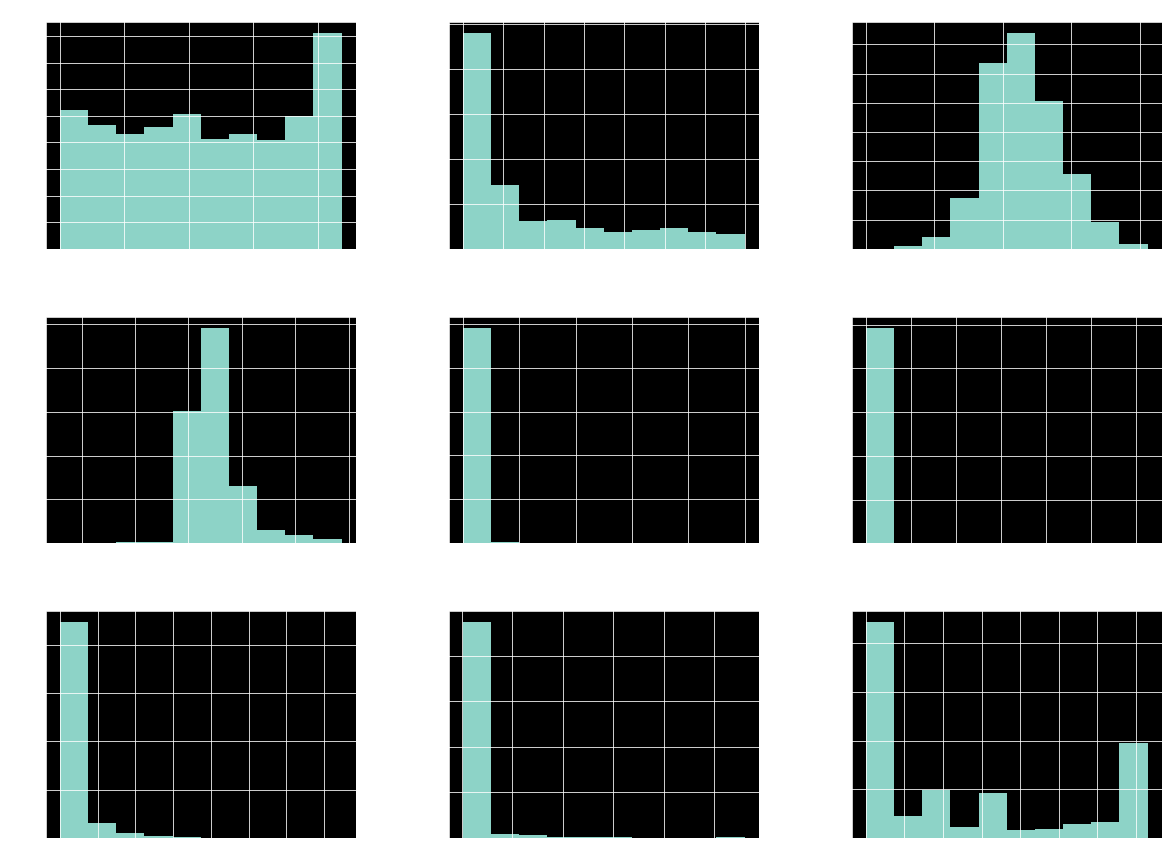

In [ ]:
# verificando as distribuições de todas as variáveis
df_ny.hist(figsize=(20,15));

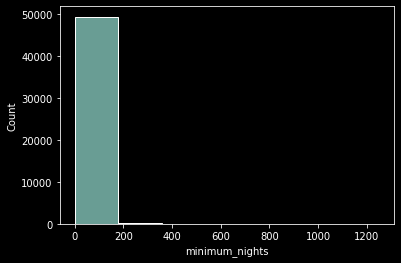

In [ ]:
#plotando o histograma apenas para a coluna minimum_nights
sns.histplot(data=df_ny, x="minimum_nights", bins=7);

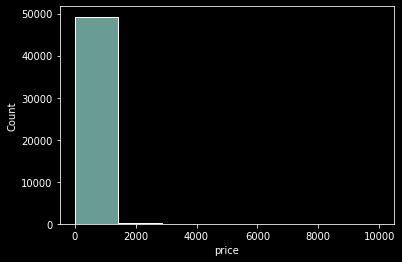

In [ ]:
#plotando o histograma apenas para a coluna price
sns.histplot(data=df_ny, x="price", bins=7);

**Verificando os histogramas, conseguimos visualizar os outliers presentes**

<p align="center"><img src="https://raw.githubusercontent.com/paulosrl/imagens/master/histogramasNY.png
"></p>



### **Calculando o valor de IQR para as colunas selecionadas**

Para tratar dos outliers desse conjunto de dados, iremos analisar a **distribuição estatística**, plotar boxplots e calcular os limites (inferior e superior) utilizando a regra da [variação interquartil](https://escoladedados.org/tutoriais/analise-com-estatistica-descritiva-para-leigos/).

**VARIAÇÃO INTERQUARTIL = Q3-Q1**

Onde Q3 (terceiro quartil) representa 75% dos dados e Q1 (primeiro quartil) representa 25% dos dados
# IQR = Q3 - Q1

Tanto o desvio padrão quanto a variância dependem da média, portanto, são afetados por valores extremos. Mas, a Variação interquartil (IQR em inglês), é uma medida de dispersão baseada na mediana, que funciona de maneira muito mais eficiente na presença de outliers, pois é pouco afetada pelo outliers.

A mediana para ser calculada precisa ordenar os dados do menor para o maior, o valor central dos dados é a [mediana](https://colab.research.google.com/drive/1ZK1zqBeBeFJ315yizvAt5UQyc7TNI1yy?authuser=1#scrollTo=hy_i5KpvUlSn).

Passos a seguir antes da remoção dos outliers:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.

### **Calculando o valor de IQR para a coluna price**

In [ ]:
# identificando os outliers para a variável price
#cálculo do IQR
q3, q1 = np.percentile(df_ny['price'], [75 ,25])
IQR = q3 - q1
#limite inferior é -1.5 vezes o valor do IQR
min = q1 - (IQR*1.5)
#limite superior é +1.5 vezes o valor do IQR
max = q3 + (IQR*1.5)
print('IQR da variável price: ', IQR)
print('Limite inferior de price: ', min)
print('Limite superior de price: ', max)

IQR da variável price:  107.0
Limite inferior de price:  -92.5
Limite superior de price:  335.5


### **Boxplot da coluna price**

Total de linhas do dataset: 49506
Entradas acima de 335.5: 2913
5.88% do dataset


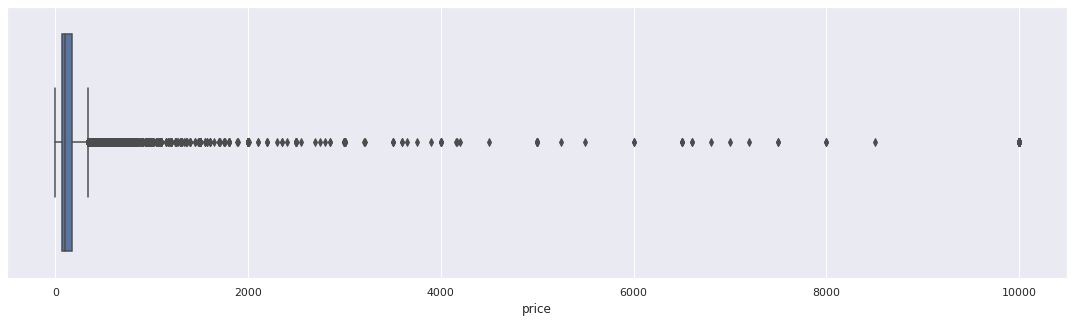

In [ ]:
# Visulizando o boxplot da coluna price
sns.set(rc={'figure.figsize':(19,5)})
sns.boxplot(x="price", data=df_ny);
print("Total de linhas do dataset: "+str(df_ny.shape[0]))
print("Entradas acima de "+str(max)+": "+str(len(df_ny[df_ny.price > max])))
print("{:.2f}% do dataset".format((len(df_ny[df_ny.price >max]) / df_ny.shape[0])*100));

### **Calculando o valor de IQR para a coluna minimum_nights**

In [ ]:
# identificando os outliers para a variável price
#cálculo do IQR
q3, q1 = np.percentile(df_ny['minimum_nights'], [75 ,25])
IQR = q3 - q1
#limite inferior é -1.5 vezes o valor do IQR
min = q1 - (IQR*1.5)
#limite superior é +1.5 vezes o valor do IQR
max = q3 + (IQR*1.5)
print('IQR da variável minimum_nights: ', IQR)
print('Limite inferior de minimum_nights: ', min)
print('Limite superior de minimum_nights: ', max)

IQR da variável minimum_nights:  4.0
Limite inferior de minimum_nights:  -4.0
Limite superior de minimum_nights:  12.0


Total de linhas do dataset: 49506
Entradas acima de 12.0: 8473
17.12% do dataset


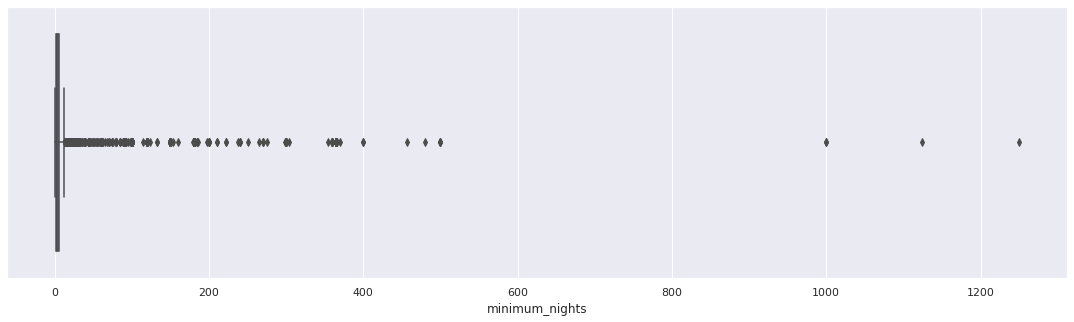

In [ ]:
# Visulizando da coluna minimum_nights
sns.set(rc={'figure.figsize':(19,5)})
sns.boxplot(x="minimum_nights", data=df_ny);
print("Total de linhas do dataset: "+str(df_ny.shape[0]))
print("Entradas acima de "+str(max)+": "+str(len(df_ny[df_ny.minimum_nights > max])))
print("{:.2f}% do dataset".format((len(df_ny[df_ny.minimum_nights >max]) / df_ny.shape[0])*100));

### **Limpando Outliers**

Decidir quais as regras de negócio que irão eliminar os outliers detectados.

Preservar o dataset original para efeito de comparação com o novo dataset que gerá criado após a limpeza dos dados.

Regras:

* para a coluna price, o limite superior calculado é de 335.5, todos os valores acima deste valor serão eliminados da amostra;
* para a coluna price, todos os valores de price iguais a zero também deverão ser eliminados;
* para a coluna minimum_nights, o limite superior calculado é de 4, todos os valores acima deste valor serão eliminados da amostra;


In [ ]:
# limpando o dataset (faz uma cópia do dataset original e armazena em df_nylimpo)
df_nylimpo = df_ny.copy()
#o limite superior calculado é de 335.5, todos os valores acima deste valor serão eliminados
df_nylimpo.drop(df_nylimpo[df_nylimpo.price > 335.5].index, axis=0, inplace=True)
#todos os valores de price iguais a zero também deverão ser eliminados
df_nylimpo.drop(df_nylimpo[df_nylimpo.price == 0.0].index, axis=0, inplace=True)
#o limite superior calculado é de 4, todos os valores acima deste valor serão eliminados
df_nylimpo.drop(df_nylimpo[df_nylimpo.minimum_nights > 4].index, axis=0, inplace=True)

print('Linhas antes da limpeza: ', df_ny.shape)
print('Linhas após a limpeza: ',df_nylimpo.shape)

Linhas antes da limpeza:  (49506, 14)
Linhas após a limpeza:  (31868, 14)


### **Comparando o dataset original com o dataset limpo (sem outliers) utilizando Boxplots**

É possível observar (dataset original) que apesar de não haverem outliers na parte inferior da amostra, existem valores iguais a zero, que precisam ser tratados.

Após a limpeza observa-se que o valor mínino dos dados igual a zero é retirado da amostra e os outliers reduziram de forma considerável.

### **Boxplot da coluna Price (antes e depois)**

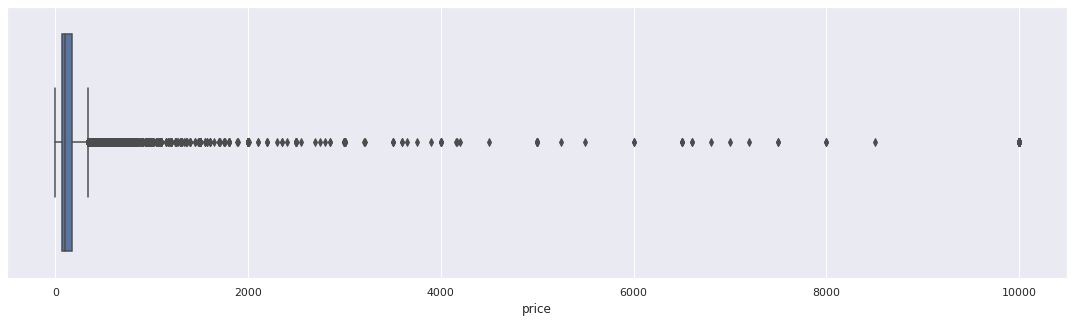

In [ ]:
#boxplot de price antes da limpeza
sns.set(rc={'figure.figsize':(19,5)})
sns.boxplot(x="price", data=df_ny);

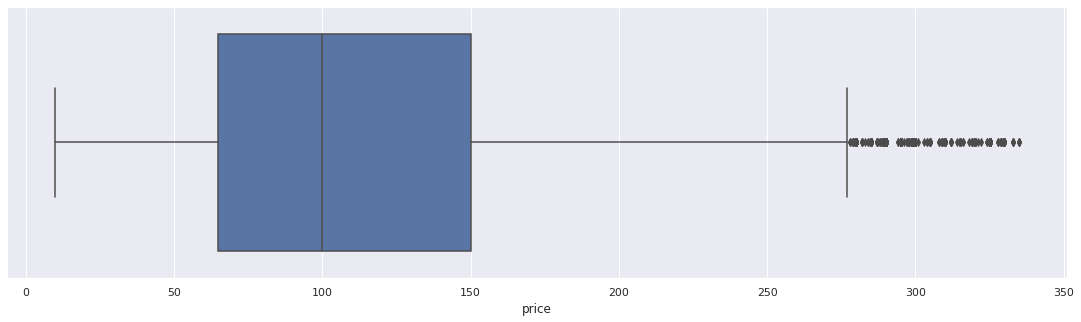

In [ ]:
#boxplot de price após a limpeza
sns.set(rc={'figure.figsize':(19,5)})
sns.boxplot(x="price", data=df_nylimpo);

### **Histograma da coluna Price (antes e depois)**

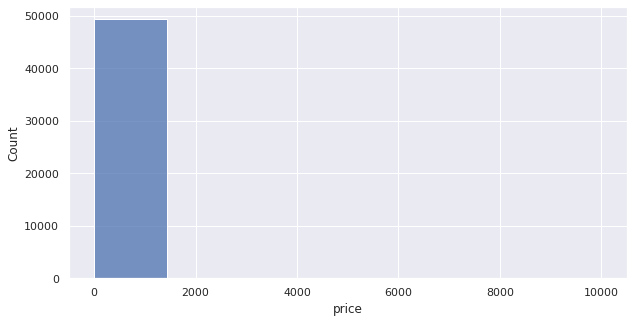

In [ ]:
#histograma apenas para a coluna price antes da limpeza
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=df_ny, x="price", bins=7);

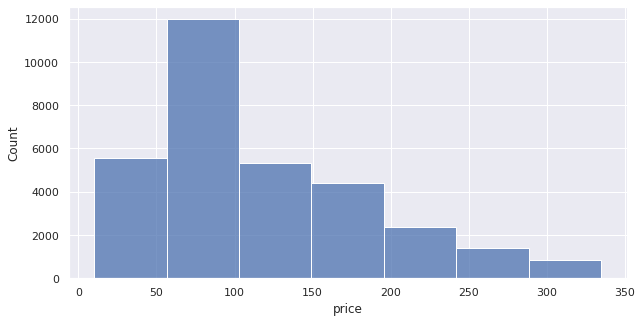

In [ ]:
#histograma para a coluna price após a limpeza
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=df_nylimpo, x="price", bins=7);

### **Boxplot da coluna minimum_nights (antes e depois)**

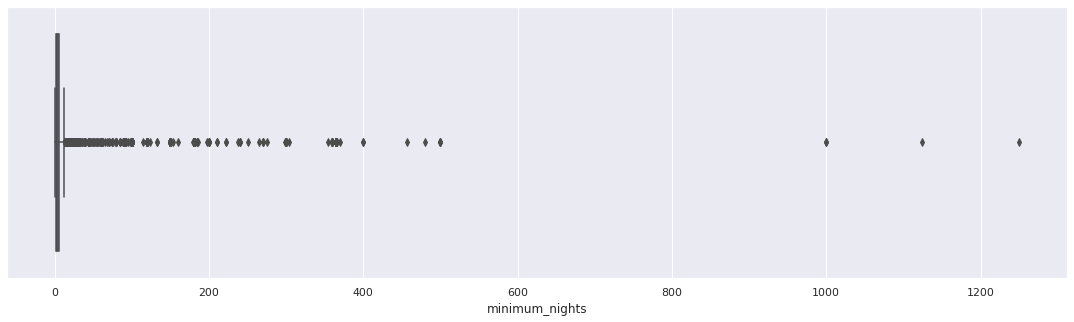

In [ ]:
#boxplot de price antes da limpeza
sns.set(rc={'figure.figsize':(19,5)})
sns.boxplot(x="minimum_nights", data=df_ny);

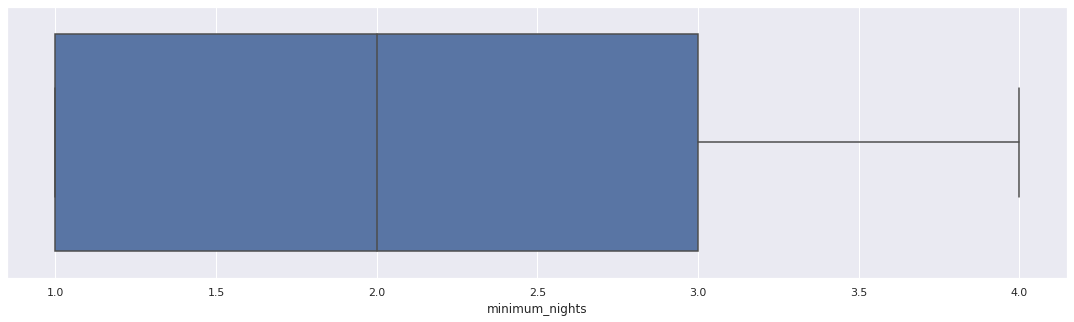

In [ ]:
#boxplot de price após a limpeza
sns.set(rc={'figure.figsize':(19,5)})
sns.boxplot(x="minimum_nights", data=df_nylimpo);

### **Histograma da coluna minimum_nights (antes e depois)**

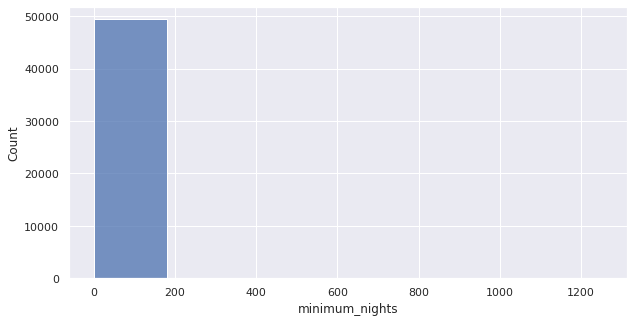

In [ ]:
#histograma apenas para a coluna minimum_nights antes da limpeza
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=df_ny, x="minimum_nights", bins=7);

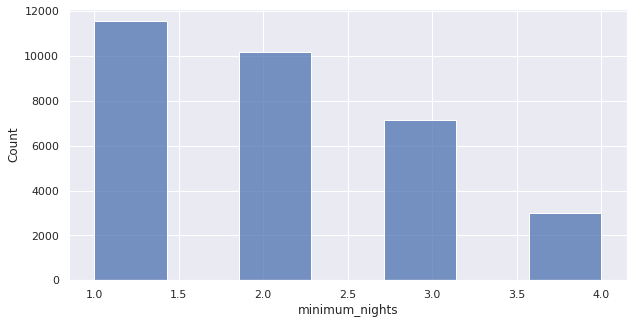

In [ ]:
#histograma apenas para a coluna minimum_nights após a limpeza
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=df_nylimpo, x="minimum_nights", bins=7);

### **Comparando o dataset original com o dataset limpo (sem outliers) utilizando Histogramas**


In [ ]:
# Resumo dos dados
print("O dataset possui {} colunas".format(df_ny.shape[0]))
print("{} Entradas acima de 335.5".format(len(df_ny[df_ny.price > 335.5])))
print("Representam {:.2f}% do dataframe".format((len(df_ny[df_ny.price > 335.5]) / df_ny.shape[0])*100))
print("Tamanho original: {} colunas".format(df_ny.shape[0]))
print("Tamanho atual: {} colunas".format(df_nylimpo.shape[0]))

O dataset possui 49506 colunas
2913 Entradas acima de 335.5
Representam 5.88% do dataframe
Tamanho original: 49506 colunas
Tamanho atual: 31868 colunas


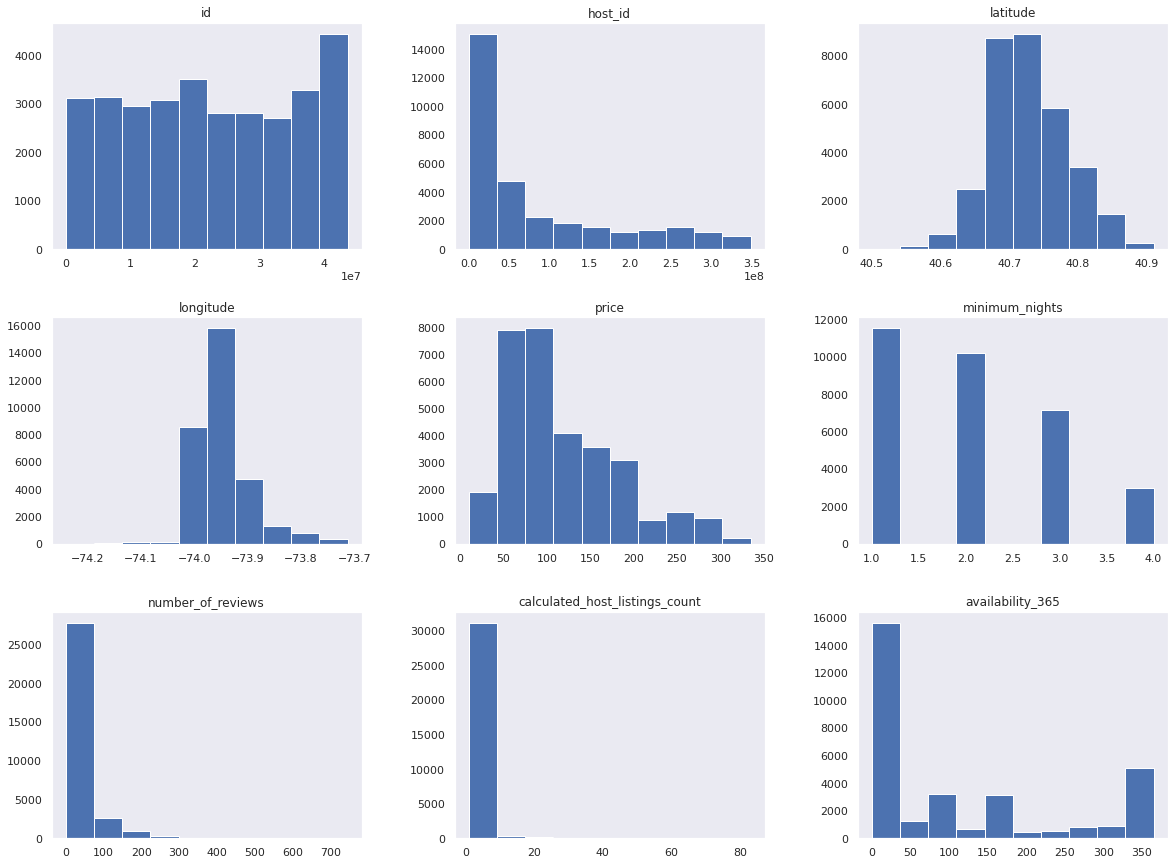

In [ ]:
# verificando as distribuições
df_nylimpo.hist(figsize=(20,15), grid=False);

**Comparando os histogramas após a remoção dos outliers**

<p align="center"><img src="https://raw.githubusercontent.com/paulosrl/imagens/master/histogramasNYcomparativo.png
"></p>


### **Verificando a distribuição estatística dos dados sem os outlier**

In [ ]:
# verificando a distribuição estatística dos dados limpos
#round(1), arredonda as casas decimais para uma unidade
df_nylimpo.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,31868.0,31868.0,31868.0,31868.0,31868.0,31868.0,31868.0,31868.0,31868.0
mean,22513849.8,85306764.8,40.7,-73.9,116.8,2.0,29.8,2.0,111.8
std,13121677.7,97742593.6,0.1,0.1,66.0,1.0,54.4,3.4,136.0
min,2060.0,2259.0,40.5,-74.2,10.0,1.0,0.0,1.0,0.0
25%,10807253.5,10087755.8,40.7,-74.0,65.0,1.0,1.0,1.0,0.0
50%,21963501.5,39492841.0,40.7,-74.0,100.0,2.0,7.0,1.0,42.0
75%,34595896.2,138782186.0,40.8,-73.9,150.0,3.0,33.0,2.0,180.0
max,43703359.0,349078564.0,40.9,-73.7,335.0,4.0,746.0,83.0,365.0


## **Considerações finais sobre a nova distribuição dos dados**.

* A **mediana** da variável **price** foi pouquíssimo afetada pela limpeza dos **outliers**, mostrando mais uma vez a robustez desse atributo como solução para **dados ausentes**.
* A **média** da variável **price** foi **reduzida** **drásticamente**, enfatizando a **sensibilidade** desse atributo em relação aos **outliers**.

**Média, Mediana e Outlier**

<p align="center"><img src="https://raw.githubusercontent.com/paulosrl/imagens/master/outlier.png
"></p>


